# 1. Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Importing the dataset 

In [3]:
dataset = pd.read_csv('C:\\Users\\python\\Desktop\\students_data\\ds_46\\module_3\\logistic regression\\Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# view the first 5 rows

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# view the last 5 rows

In [5]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


# counts of male and female

In [6]:
male = dataset[dataset['Gender'] == 'Male']['Gender'].size
male
        

196

In [7]:
female = dataset[dataset['Gender'] == 'Female']['Gender'].size
female

204

# Plot male vs female

In [8]:
gender = ['Male','Female']
y_pos = np.arange(2)
gender_count = [male,female]
x_pos = [i for i in gender]
x_pos

['Male', 'Female']

<function matplotlib.pyplot.show(close=None, block=None)>

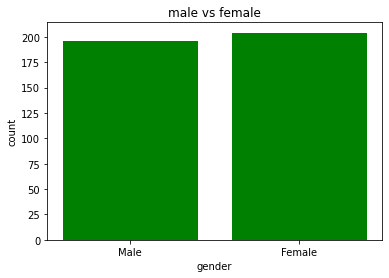

In [9]:
plt.bar(x_pos,gender_count, color = 'green')
plt.xlabel('gender')
plt.ylabel('count')
plt.title('male vs female')
plt.show

# How many male vs female bought or not bought


In [12]:
men_purchased = dataset[(dataset['Purchased'] == 1) & (dataset['Gender'] == 'Male')]['Gender'].size
men_purchased_no = dataset[(dataset['Purchased'] == 0) & (dataset['Gender'] == 'Male')].size
female_purchased = dataset[(dataset['Purchased'] == 1) & (dataset['Gender'] == 'Female')].size
female_purchased_no = dataset[(dataset['Purchased'] == 0) & (dataset['Gender'] == 'Female')].size

In [14]:
men_purchased

66

In [16]:
men_purchased_no

650

In [18]:
female_purchased

385

In [20]:
female_purchased_no

635

# Set up training and testing data

In [24]:
x = dataset.iloc[:,1:4].values
x

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [27]:
y = dataset.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x = LabelEncoder()
x[:,0] = label_encoder_x.fit_transform(x[:,0])
x

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 10)

# Fitting logistic regression into the training set

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [36]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)


In [42]:
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [44]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
y_test

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
print(accuracy_score(y_test,y_pred))

0.9


In [50]:
print(confusion_matrix(y_test,y_pred))

[[64  5]
 [ 5 26]]
